## Start from this Cell


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install nltk


In [3]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_excel
dataframe=pd.read_csv('/content/drive/MyDrive/Ahsan Thesis/Hate speech/Hate speech/dataset.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
dataframe.head(10)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
5,6,"Covid Act Now found ""on average each person in...",real
6,7,If you tested positive for #COVID19 and have n...,real
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake
8,9,"???Clearly, the Obama administration did not l...",fake
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake


In [5]:
dataframe.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [6]:
dataframe['label'].value_counts()

real    3360
fake    3060
Name: label, dtype: int64

In [7]:
dataframe["label"].replace({"fake": 0, "real": 1}, inplace=True)

In [8]:
dataframe

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0


In [11]:
df1=dataframe.dropna()

In [13]:
df1.isna().sum()

id       0
tweet    0
label    0
dtype: int64

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

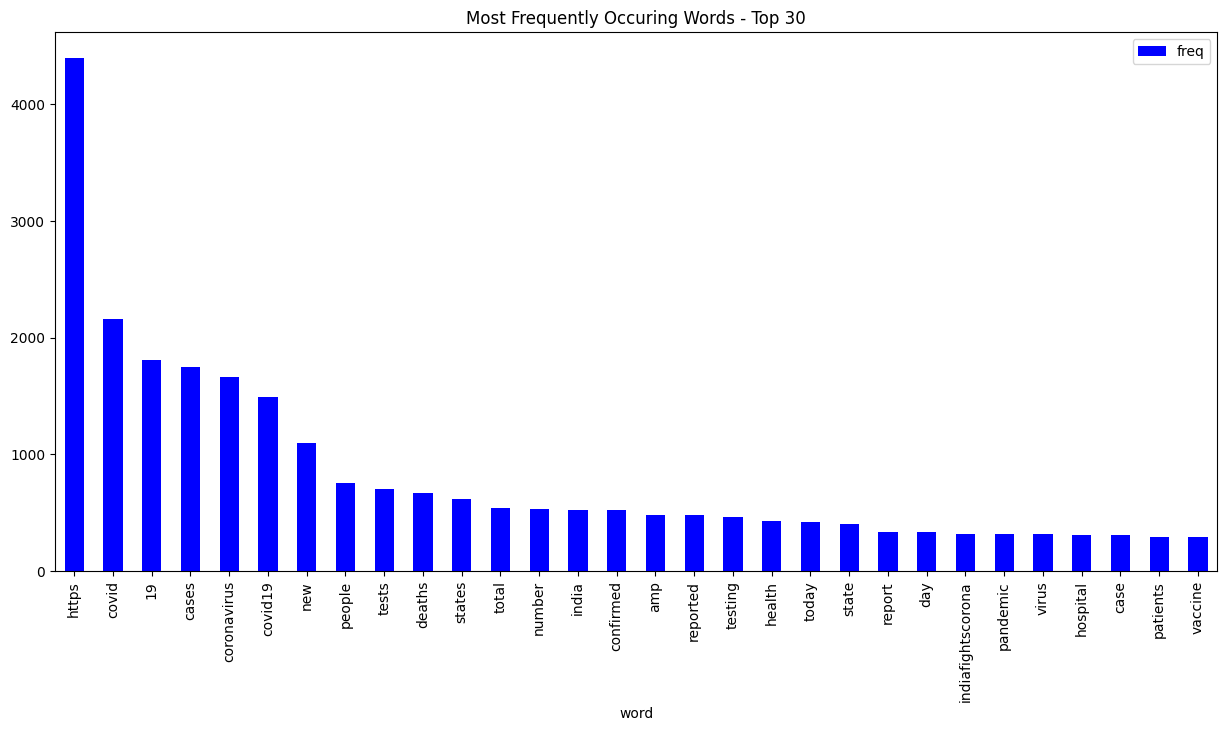

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df1.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

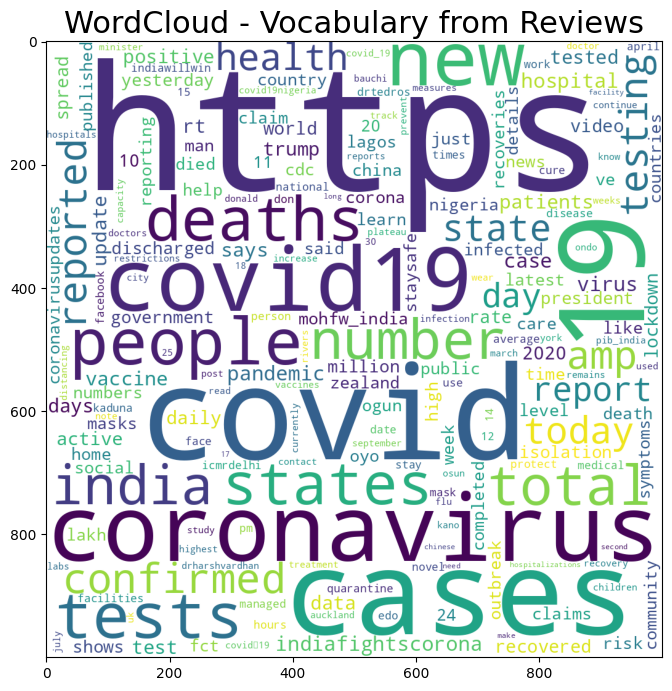

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [16]:
df1

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0


In [17]:
labels=df1.label.values

In [18]:
features=df1.tweet.values

In [40]:
import re

processed_features = []

for sentence in range(0, len(features)):
    # Remove URLs
    processed_feature = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', str(features[sentence]))

    # Remove 'http' and 'https' tags
    processed_feature = re.sub(r'http|https', '', processed_feature)

    # Remove numbers
    processed_feature = re.sub(r'\d+', '', processed_feature)

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with a single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [37]:
(features)

array(['The CDC currently reports 99031 deaths. In general the discrepancies in death counts between different sources are small and explicable. The death toll stands at roughly 100000 people today.',
       'States reported 1121 deaths a small rise from last Tuesday. Southern states reported 640 of those deaths. https://t.co/YASGRTT4ux',
       'Politically Correct Woman (Almost) Uses Pandemic as Excuse Not to Reuse Plastic Bag https://t.co/thF8GuNFPe #coronavirus #nashville',
       ...,
       '_A post claims a COVID-19 vaccine has already been developed and will cause widespread infertility._',
       'Aamir Khan Donate 250 Cr. In PM Relief Cares Fund',
       'It has been 93 days since the last case of COVID-19 was acquired locally from an unknown source. The total number of active cases of COVID-19 in New Zealand’s managed isolation and quarantine facilities is now 25.'],
      dtype=object)

In [38]:
type(processed_features)

list

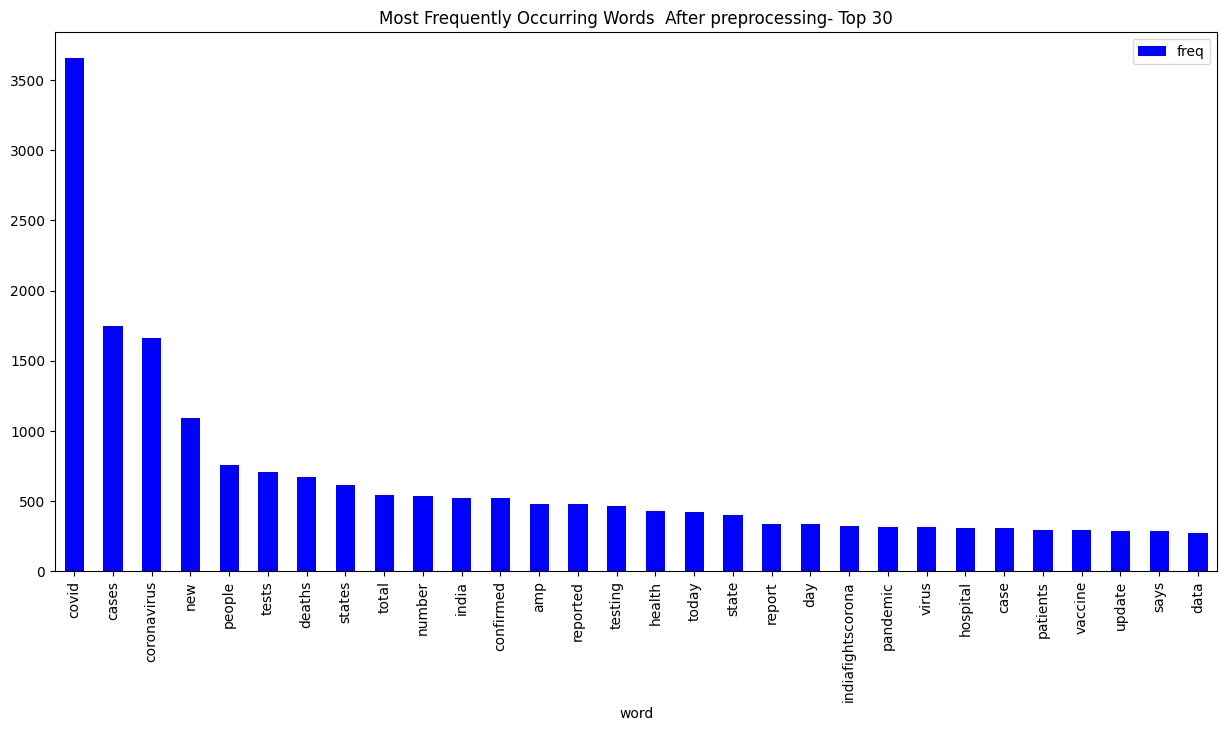

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt


words = cv.fit_transform(processed_features)


sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')
plt.title("Most Frequently Occurring Words  After preprocessing- Top 30")
plt.show()


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews After preprocessing')

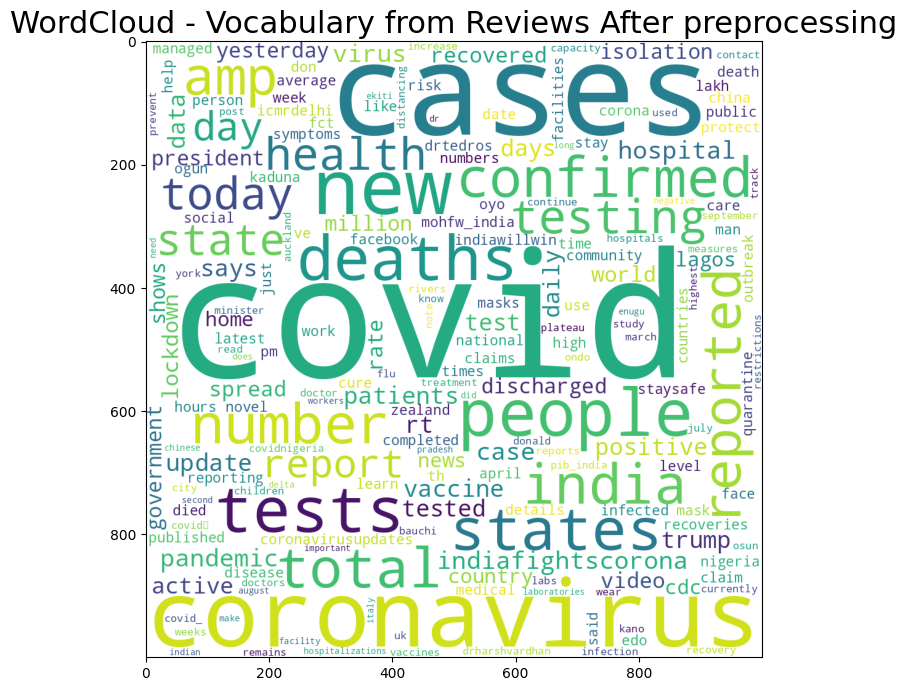

In [44]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews After preprocessing", fontsize = 22)

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=200, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

#Random FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
predictions

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[538  89]
 [ 52 605]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       627
           1       0.87      0.92      0.90       657

    accuracy                           0.89      1284
   macro avg       0.89      0.89      0.89      1284
weighted avg       0.89      0.89      0.89      1284

0.8901869158878505


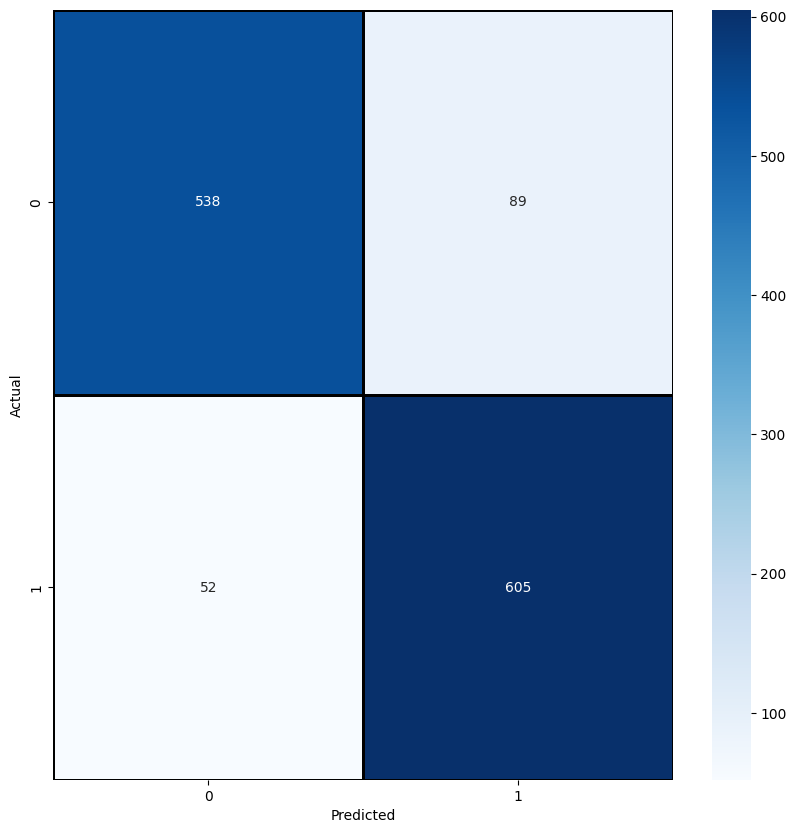

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions)
sn.set(font_scale=2.5)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

[[612  15]
 [327 330]]
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       627
           1       0.96      0.50      0.66       657

    accuracy                           0.73      1284
   macro avg       0.80      0.74      0.72      1284
weighted avg       0.81      0.73      0.72      1284

0.7336448598130841


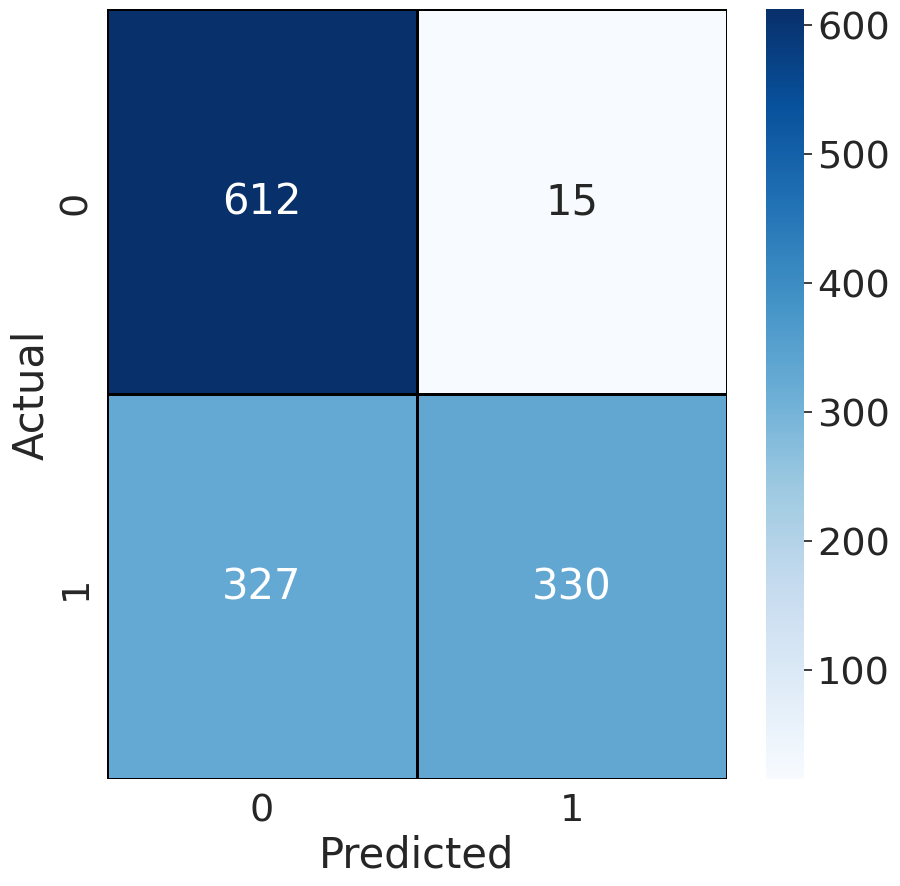

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions2)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions2)
sn.set(font_scale=2.5)

# LOGIESTIC RESGGESION

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions3 = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))

[[540  87]
 [ 55 602]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       627
           1       0.87      0.92      0.89       657

    accuracy                           0.89      1284
   macro avg       0.89      0.89      0.89      1284
weighted avg       0.89      0.89      0.89      1284

0.8894080996884736


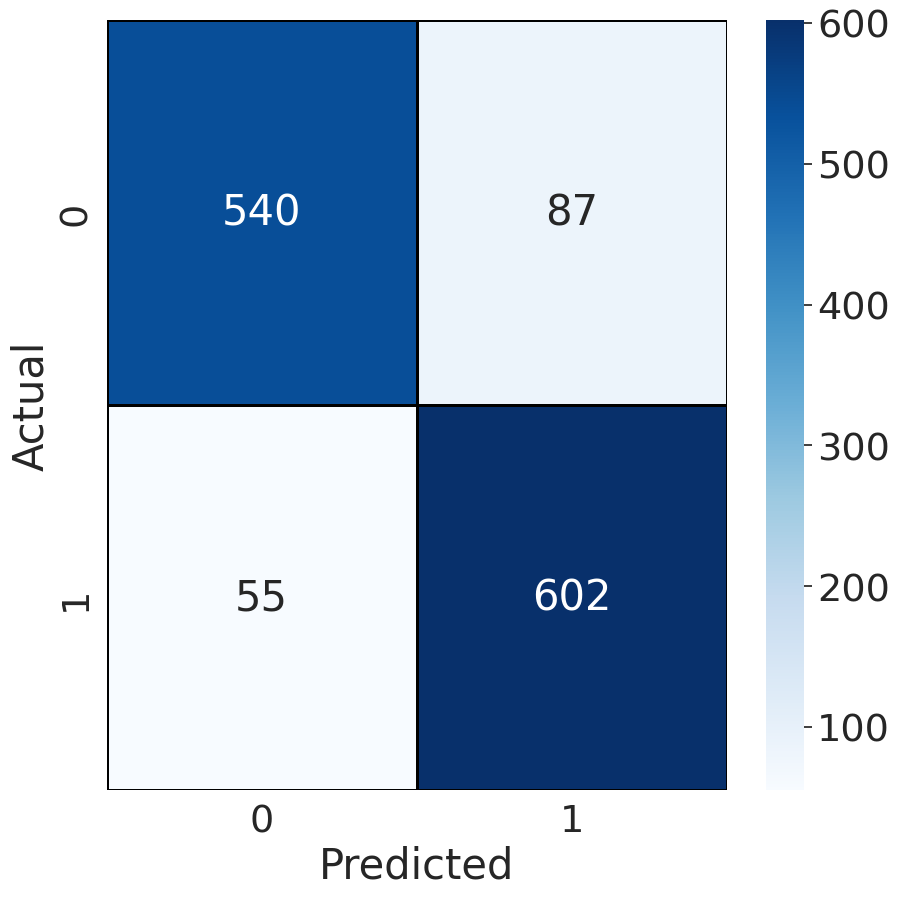

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions3)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,predictions3)
sn.set(font_scale=2.5)

#DESSION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[517 110]
 [ 83 574]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       627
           1       0.84      0.87      0.86       657

    accuracy                           0.85      1284
   macro avg       0.85      0.85      0.85      1284
weighted avg       0.85      0.85      0.85      1284

0.8496884735202492


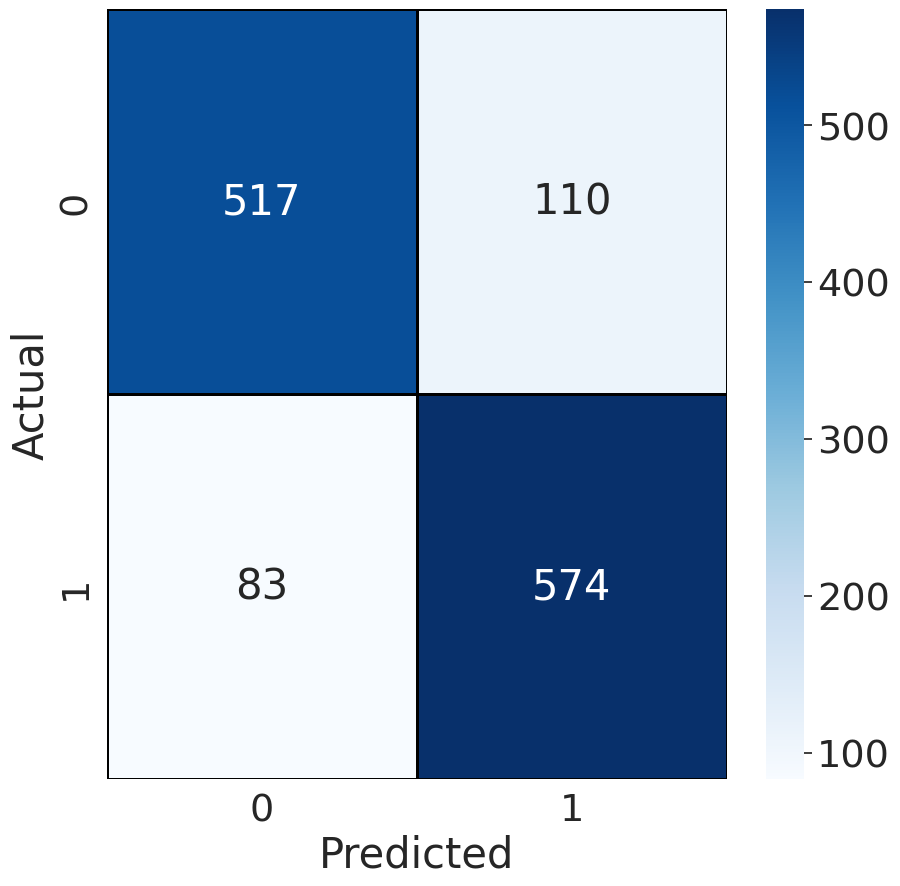

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,y_pred)
sn.set(font_scale=2.5)

# svm

In [ ]:
from sklearn.svm import SVC

model6 = SVC()
model6.fit(X_train, y_train)

y_pred6 = model6.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test, y_pred6))

[[549  78]
 [ 57 600]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       627
           1       0.88      0.91      0.90       657

    accuracy                           0.89      1284
   macro avg       0.90      0.89      0.89      1284
weighted avg       0.90      0.89      0.89      1284

0.8948598130841121


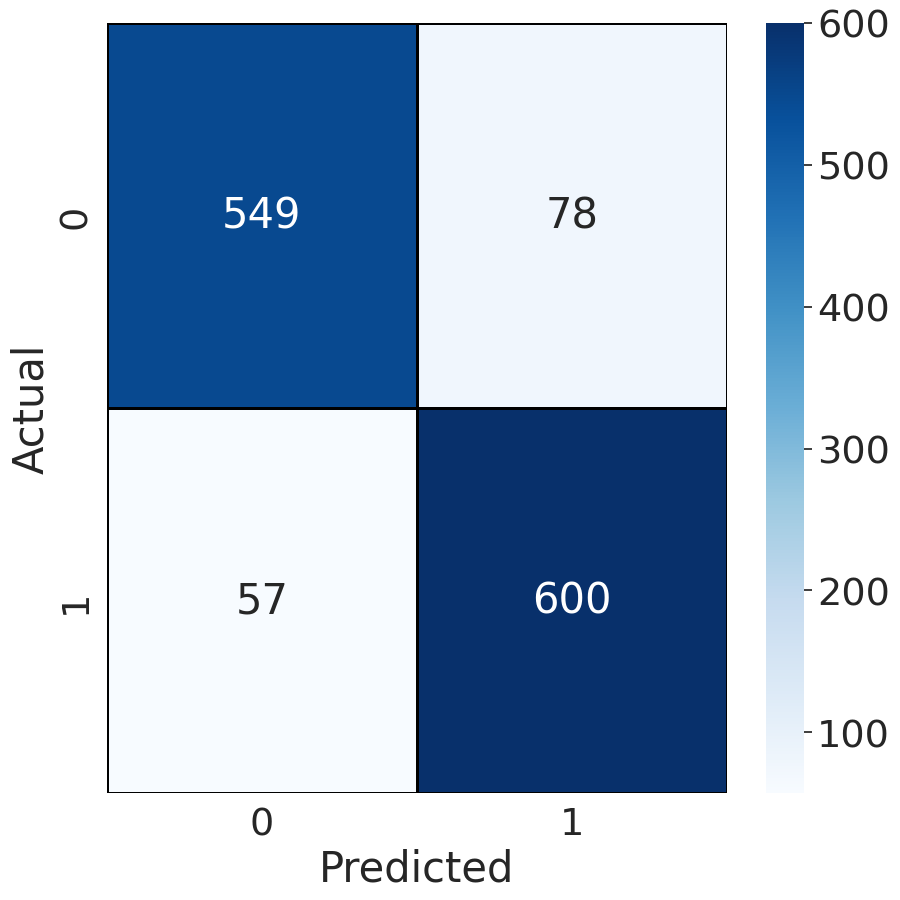

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred6)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
cm = metrics.confusion_matrix(y_test,y_pred6)
sn.set(font_scale=2.5)